In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
## obtenir dataframe à partir du csv
def getOriginalDf(pPath = './utils/lending_club_loans.csv'):
    return pd.read_csv(pPath)

In [4]:
df_loan = getOriginalDf()
df_loan.describe(include='all')

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.978600e+04,3.978600e+04,39786.000000,39786.000000,39786.000000,39786,39786,39786.000000,39786,39786,...,39786.000000,39715,39786.000000,39784,39730.0,39786,39730.0,39786.0,39089.000000,39747.0
unique,NaN,NaN,NaN,NaN,NaN,2,371,NaN,7,35,...,NaN,109,NaN,114,NaN,1,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,36 months,10.99%,NaN,B,B3,...,NaN,Mar-13,NaN,Jan-17,NaN,INDIVIDUAL,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,29096,958,NaN,12035,2924,...,NaN,1026,NaN,10469,NaN,39786,NaN,NaN,NaN,NaN
mean,6.833939e+05,8.507937e+05,11231.360277,10958.722289,10409.018679,NaN,NaN,324.733637,NaN,NaN,...,12.625390,NaN,2679.092793,NaN,0.0,NaN,0.0,0.0,0.043286,0.0
std,2.106770e+05,2.656370e+05,7464.542832,7194.076908,7135.760122,NaN,NaN,208.923212,NaN,NaN,...,149.855504,NaN,4443.383020,NaN,0.0,NaN,0.0,0.0,0.204381,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,NaN,NaN,15.690000,NaN,NaN,...,0.000000,NaN,0.000000,NaN,0.0,NaN,0.0,0.0,0.000000,0.0
25%,5.163518e+05,6.670548e+05,5500.000000,5400.000000,5000.000000,NaN,NaN,167.080000,NaN,NaN,...,0.000000,NaN,218.072500,NaN,0.0,NaN,0.0,0.0,0.000000,0.0
50%,6.662295e+05,8.515440e+05,10000.000000,9650.000000,8975.000000,NaN,NaN,280.610000,NaN,NaN,...,0.000000,NaN,549.425000,NaN,0.0,NaN,0.0,0.0,0.000000,0.0
75%,8.378710e+05,1.047528e+06,15000.000000,15000.000000,14400.000000,NaN,NaN,430.780000,NaN,NaN,...,0.000000,NaN,3292.122500,NaN,0.0,NaN,0.0,0.0,0.000000,0.0


In [5]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39786 entries, 0 to 39785
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39786 non-null  int64  
 1   member_id                   39786 non-null  int64  
 2   loan_amnt                   39786 non-null  int64  
 3   funded_amnt                 39786 non-null  int64  
 4   funded_amnt_inv             39786 non-null  float64
 5   term                        39786 non-null  object 
 6   int_rate                    39786 non-null  object 
 7   installment                 39786 non-null  float64
 8   grade                       39786 non-null  object 
 9   sub_grade                   39786 non-null  object 
 10  emp_length                  38708 non-null  object 
 11  home_ownership              39786 non-null  object 
 12  annual_inc                  39786 non-null  float64
 13  verification_status         397

In [6]:
df_loan.shape

(39786, 47)

In [7]:
df_loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'application_type',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens'],
      dtype='object')

In [8]:
### count null dans les colonnes
col_name = ['col_name', 'cnt_null']
#df_cols = pd.DataFrame( df_loan.isnull().sum(), columns = col_name)
df_cols = pd.DataFrame( df_loan.isnull().sum())
df_cols


,0
id,0
member_id,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0


In [9]:
### % null dans chaque colonne
#df_cols[df_cols[0]>0] /len (df_loan)
pct_nulls = 100 * (df_cols[df_cols[0]>0] /len (df_loan))
pct_cols_ayant_null = 100*(len(df_cols[df_cols[0]>0])/(len(df_loan.columns)))

print("% de cols ayant null: ", pct_cols_ayant_null)
print ("% de null dans les colonnes ayant null: ", pct_nulls)

% de cols ayant null:  17.02127659574468
% de null dans les colonnes ayant null:                                     0
emp_length                  2.709496
revol_util                  0.125672
last_pymnt_d                0.178455
last_credit_pull_d          0.005027
collections_12_mths_ex_med  0.140753
chargeoff_within_12_mths    0.140753
pub_rec_bankruptcies        1.751873
tax_liens                   0.098024


In [10]:
### on supprime les colonnes id car elles ne devraient pas influencer le résultat du prêt
cols_drop = ['id', 'member_id']
df_loan.drop(cols_drop, axis=1, inplace=True)

In [11]:
## df_obj = dataframe avec col type obj
df_obj = df_loan.select_dtypes('object')
df_obj.head()

,term,int_rate,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
0,36 months,10.65%,B,B2,10+ years,RENT,Verified,Dec-11,Fully Paid,n,860xx,AZ,Jan-85,83.70%,f,Jan-15,Jan-17,INDIVIDUAL
1,60 months,15.27%,C,C4,< 1 year,RENT,Source Verified,Dec-11,Charged Off,n,309xx,GA,Apr-99,9.40%,f,Apr-13,Oct-16,INDIVIDUAL
2,36 months,15.96%,C,C5,10+ years,RENT,Not Verified,Dec-11,Fully Paid,n,606xx,IL,Nov-01,98.50%,f,Jun-14,Jan-17,INDIVIDUAL
3,36 months,13.49%,C,C1,10+ years,RENT,Source Verified,Dec-11,Fully Paid,n,917xx,CA,Feb-96,21%,f,Jan-15,Apr-16,INDIVIDUAL
4,60 months,12.69%,B,B5,1 year,RENT,Source Verified,Dec-11,Fully Paid,n,972xx,OR,Jan-96,53.90%,f,Jan-17,Jan-17,INDIVIDUAL


In [12]:
## Par exemple, quelle est le type date 'issue_d' ?
print(type(df_obj['issue_d'][0]))
print(type(df_obj['earliest_cr_line'][0]))

<class 'str'>
<class 'str'>


In [13]:
## valeurs unique dans chaque colonne
df_obj.nunique()

term                      2
int_rate                371
grade                     7
sub_grade                35
emp_length               11
home_ownership            5
verification_status       3
issue_d                  55
loan_status               7
pymnt_plan                1
zip_code                823
addr_state               50
earliest_cr_line        526
revol_util             1089
initial_list_status       1
last_pymnt_d            109
last_credit_pull_d      114
application_type          1
dtype: int64

In [14]:
### Requêtes pour confirmer si le valeurs sont unique ou s'il s'agit d'une valeur plus null
# df_obj['application_type'].isnull().sum()
df_obj['pymnt_plan'].isnull().sum()

0

In [15]:
## df numérique
df_num = df_loan.select_dtypes(exclude='object')

<AxesSubplot: >

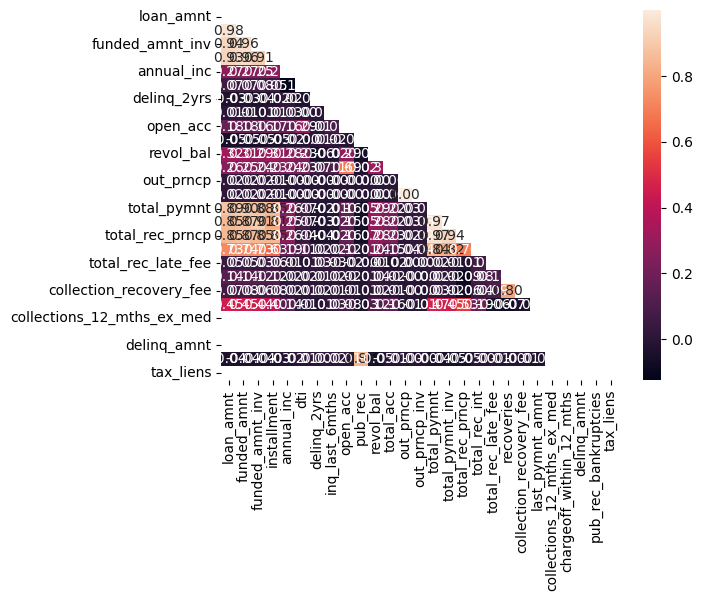

In [16]:
corr = df_num.corr()
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, fmt=".2f", mask=matrix)

In [17]:
#### On ne peut pas voir grandes choses avec la visualisation ci-haut
## Voyons le tableau de correlation
corr

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
loan_amnt,1.000000,0.981544,0.940157,0.930209,0.271340,0.067136,-0.031484,0.009442,0.177216,-0.051075,...,0.729182,0.048918,0.135793,0.073813,0.448646,NaN,NaN,NaN,-0.037105,NaN
funded_amnt,0.981544,1.000000,0.958564,0.956108,0.267130,0.067035,-0.031948,0.009383,0.175515,-0.051956,...,0.736803,0.051040,0.136719,0.075694,0.453140,NaN,NaN,NaN,-0.038381,NaN
funded_amnt_inv,0.940157,0.958564,1.000000,0.905098,0.254545,0.075448,-0.038064,-0.005552,0.163031,-0.052957,...,0.730512,0.031926,0.124469,0.061631,0.442638,NaN,NaN,NaN,-0.042596,NaN
installment,0.930209,0.956108,0.905098,1.000000,0.271119,0.054730,-0.019309,0.009894,0.172885,-0.046438,...,0.633488,0.059478,0.118458,0.076150,0.401955,NaN,NaN,NaN,-0.034029,NaN
annual_inc,0.271340,0.267130,0.254545,0.271119,1.000000,-0.122537,0.022985,0.034226,0.158178,-0.018611,...,0.185172,0.006819,0.021827,0.015889,0.140589,NaN,NaN,NaN,-0.016809,NaN
dti,0.067136,0.067035,0.075448,0.054730,-0.122537,1.000000,-0.034562,0.001452,0.288087,-0.004573,...,0.106688,-0.010138,0.024738,0.011035,0.005332,NaN,NaN,NaN,0.005737,NaN
delinq_2yrs,-0.031484,-0.031948,-0.038064,-0.019309,0.022985,-0.034562,1.000000,0.007854,0.011822,0.007205,...,0.023506,0.032490,0.014231,0.015500,-0.012110,NaN,NaN,NaN,0.003209,NaN
inq_last_6mths,0.009442,0.009383,-0.005552,0.009894,0.034226,0.001452,0.007854,1.000000,0.091554,0.024937,...,0.021614,0.029126,0.019230,0.012618,0.028523,NaN,NaN,NaN,0.016173,NaN
open_acc,0.177216,0.175515,0.163031,0.172885,0.158178,0.288087,0.011822,0.091554,1.000000,-0.000098,...,0.123848,-0.017265,0.015589,0.005580,0.079065,NaN,NaN,NaN,0.005789,NaN
pub_rec,-0.051075,-0.051956,-0.052957,-0.046438,-0.018611,-0.004573,0.007205,0.024937,-0.000098,1.000000,...,-0.007002,-0.002965,-0.005642,-0.005664,-0.032375,NaN,NaN,NaN,0.845864,NaN


In [18]:
#lstCols = ['title', 'revol_util', 'pub_rec_bankruptcies']
lstCols = [ 'revol_util', 'pub_rec_bankruptcies']
dfNettoyage =  df_loan[lstCols]

In [19]:
dfNettoyage.head()

,revol_util,pub_rec_bankruptcies
0,83.70%,0.0
1,9.40%,0.0
2,98.50%,0.0
3,21%,0.0
4,53.90%,0.0


In [20]:
## drop colonnes
lst_cols_drop = ['pub_rec_bankruptcies', 'emp_length']
df_loan2 = df_loan.drop(lst_cols_drop, axis=1)

In [21]:
df_loan2.shape

(39786, 43)

In [22]:
## combien de lignes ayant null
df_loan2.isnull().sum(axis=1).astype(bool).sum()

175

In [23]:
## si on les supprime, on ne perd pas grandes choses (seulement 175 rows)
df_loan2.dropna(inplace=True)

In [24]:
df_loan2.shape

(39611, 43)

In [26]:
## On suit les même conseils de https://www.dataquest.io/blog/machine-learning-preparing-data/
## on va simplifier la colonne 'loan_status' 
'''
We're interested in being able to predict which of 'Fully Paid' or 'Charged Off' 
a loan will fall under, so we can treat the problem as binary classification. 
Let's remove all the loans that don't contain either 'Fully Paid' or 'Charged Off' as the loan's status 
and then transform the 'Fully Paid' values to 1 for the positive case and the 'Charged Off' 
values to 0 for the negative case.

This will mean that out of the ~42,000 rows we have, we'll be removing just over 3,000.
'''


df_loan2 = df_loan2[(df_loan2["loan_status"] == "Fully Paid") |
(df_loan2["loan_status"] == "Charged Off")]
mapping_dictionary = {"loan_status":{ "Fully Paid": 1, "Charged Off": 0}}
df_loan2 = df_loan2.replace(mapping_dictionary)
df_loan2.shape

(39595, 43)

In [27]:
## fonction pour obtenir un df sans les colonnes à exclure
def getDfExcludeCols(pDfOrig, pColsExclusion):
    return pDfOrig.drop(pColsExclusion, axis=1)

In [28]:
### suppression des colonnes non pertinentes pour l'analyse
cols_sup=[
    #'id', 'member_id', 
     'funded_amnt', 'funded_amnt_inv', 'sub_grade', 'int_rate'
   # , 'emp_title'
   , 'issue_d'
    , 'zip_code', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp'
, 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d'
, 'last_pymnt_amnt'
]

In [29]:
df_loan3 = getDfExcludeCols(df_loan2, cols_sup)

In [30]:
df_loan3.shape

(39595, 26)

In [31]:
df_loan3.isnull().sum()

loan_amnt                     0
term                          0
installment                   0
grade                         0
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
pymnt_plan                    0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
last_credit_pull_d            0
collections_12_mths_ex_med    0
application_type              0
chargeoff_within_12_mths      0
delinq_amnt                   0
tax_liens                     0
dtype: int64

In [32]:
df_obj = df_loan3.select_dtypes(include='object')
df_obj

,term,grade,home_ownership,verification_status,pymnt_plan,addr_state,earliest_cr_line,revol_util,initial_list_status,last_credit_pull_d,application_type
0,36 months,B,RENT,Verified,n,AZ,Jan-85,83.70%,f,Jan-17,INDIVIDUAL
1,60 months,C,RENT,Source Verified,n,GA,Apr-99,9.40%,f,Oct-16,INDIVIDUAL
2,36 months,C,RENT,Not Verified,n,IL,Nov-01,98.50%,f,Jan-17,INDIVIDUAL
3,36 months,C,RENT,Source Verified,n,CA,Feb-96,21%,f,Apr-16,INDIVIDUAL
4,60 months,B,RENT,Source Verified,n,OR,Jan-96,53.90%,f,Jan-17,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...
39730,36 months,A,OWN,Not Verified,n,WA,Sep-84,0.70%,f,Aug-07,INDIVIDUAL
39731,36 months,A,OWN,Not Verified,n,WA,Sep-84,1%,f,Aug-07,INDIVIDUAL
39732,36 months,C,RENT,Not Verified,n,VA,Aug-01,79.60%,f,Jun-11,INDIVIDUAL
39733,36 months,B,RENT,Not Verified,n,NY,Aug-00,19.80%,f,Aug-10,INDIVIDUAL


In [33]:
## Comme on peut voir, ce sont encore plusieurs colonnes non-numériques. Certaines sont de dates
df_obj.nunique()

term                      2
grade                     7
home_ownership            5
verification_status       3
pymnt_plan                1
addr_state               50
earliest_cr_line        526
revol_util             1089
initial_list_status       1
last_credit_pull_d      111
application_type          1
dtype: int64

In [34]:
## par le résultat ci-haut, on voit que l'ont peut supprimer encore certaines colonnes.
## Ce sont des colonnes ayant une seule valeur distincte, elle ne contribuent en rien pour l'analyse

## En plus, suivant https://www.dataquest.io/blog/machine-learning-preparing-data/,
## on va supprimer les colonnes earliest_cr_line et last_credit_pull_d
cols_sup=['application_type', 'initial_list_status', 'pymnt_plan', 'earliest_cr_line', 'last_credit_pull_d']

df_loan3 = getDfExcludeCols(df_loan3, cols_sup)

df_loan3.shape

(39595, 21)

In [35]:
df_obj = df_loan3.select_dtypes(include='object')
df_obj.nunique()

term                      2
grade                     7
home_ownership            5
verification_status       3
addr_state               50
revol_util             1089
dtype: int64

In [69]:
#df_obj['home_ownership']
df_obj['home_ownership'].value_counts()
#df_obj.groupby(by=['home_ownership']).sum()

RENT        18809
MORTGAGE    17642
OWN          3047
OTHER          96
NONE            1
Name: home_ownership, dtype: int64

In [75]:
df_loan3[df_loan3['home_ownership']=='NONE'] = None
df_loan3.dropna(inplace=True)
df_loan3.shape

(39594, 21)

In [45]:
### Regardons les colonnes:

#df_loan3['revol_util'] #--> numérique, enlever %
#df_loan3['term'] #--> catégorique 36, 60 (ordinal)
#df_loan3['grade'] #--> catégorique (ordinal)
#df_loan3['home_ownership'] #--> catégorique
#df_loan3['verification_status'] #--> catégorique
#df_loan3['addr_state'] #--> US states


array([1, 0])

In [46]:
## col revol_util
df_loan3['revol_util'] = df_loan3['revol_util'].str.rstrip('%').astype('float')
#df_loan3['revol_util'].replace(to_replace='%', value='')

In [47]:
df_loan3['revol_util']
#df_loan3['last_credit_pull_d']

0        83.7
1         9.4
2        98.5
3        21.0
4        53.9
         ... 
39730     0.7
39731     1.0
39732    79.6
39733    19.8
39734    11.0
Name: revol_util, Length: 39595, dtype: float64

In [133]:
df_loan3['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [76]:
## Transformation variables ordinaires term, grade
map_ord = {
#'term' :
#{
#' 36 months':1
#,' 60 months':2 
#},
'grade':
{
   "A": 1,
"B": 2,
"C": 3,
"D": 4,
"E": 5,
"F": 6,
"G": 7 
}
}

df_loan4 = df_loan3.replace(map_ord)
df_loan4.head()


,loan_amnt,term,installment,grade,home_ownership,annual_inc,verification_status,loan_status,addr_state,dti,...,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,chargeoff_within_12_mths,delinq_amnt,tax_liens
0,5000.0,36 months,162.87,2,RENT,24000.0,Verified,1.0,AZ,27.65,...,1.0,3.0,0.0,13648.0,83.7,9.0,0.0,0.0,0.0,0.0
1,2500.0,60 months,59.83,3,RENT,30000.0,Source Verified,0.0,GA,1.00,...,5.0,3.0,0.0,1687.0,9.4,4.0,0.0,0.0,0.0,0.0
2,2400.0,36 months,84.33,3,RENT,12252.0,Not Verified,1.0,IL,8.72,...,2.0,2.0,0.0,2956.0,98.5,10.0,0.0,0.0,0.0,0.0
3,10000.0,36 months,339.31,3,RENT,49200.0,Source Verified,1.0,CA,20.00,...,1.0,10.0,0.0,5598.0,21.0,37.0,0.0,0.0,0.0,0.0
4,3000.0,60 months,67.79,2,RENT,80000.0,Source Verified,1.0,OR,17.94,...,0.0,15.0,0.0,27783.0,53.9,38.0,0.0,0.0,0.0,0.0


In [49]:
df_loan4.shape

(39595, 21)

In [57]:
print(df_loan4.columns)

Index(['loan_amnt', 'term', 'installment', 'grade', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'addr_state', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'collections_12_mths_ex_med',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')


In [77]:
## Transformation d'autres variables catégoriques
# df_loan3['home_ownership'] #--> catégorique
# df_loan3['verification_status'] #--> catégorique
# df_loan3['addr_state'] #--> US states
# df_loan3['loan_status'] #--> categorical
nominal_cols = ['home_ownership', 'verification_status', 'addr_state'] 

In [78]:
newDf=None
newDf = pd.get_dummies(data=df_loan4, prefix = nominal_cols, columns=nominal_cols, drop_first=True)
print(newDf.columns)

Index(['loan_amnt', 'term', 'installment', 'grade', 'annual_inc',
       'loan_status', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'delinq_amnt',
       'tax_liens', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT', 'verification_status_Source Verified',
       'verification_status_Verified', 'addr_state_AL', 'addr_state_AR',
       'addr_state_AZ', 'addr_state_CA', 'addr_state_CO', 'addr_state_CT',
       'addr_state_DC', 'addr_state_DE', 'addr_state_FL', 'addr_state_GA',
       'addr_state_HI', 'addr_state_IA', 'addr_state_ID', 'addr_state_IL',
       'addr_state_IN', 'addr_state_KS', 'addr_state_KY', 'addr_state_LA',
       'addr_state_MA', 'addr_state_MD', 'addr_state_ME', 'addr_state_MI',
       'addr_state_MN', 'addr_state_MO', 'addr_state_MS', 'addr_state_MT',
       'addr_state_NC', 'addr_state_NE', 'addr_state_NH', 'addr_

In [ ]:
df_obj = df_loan3.select_dtypes(include='object')

In [78]:
df_loan.drop(cols_sup, axis=1, inplace=True)

In [81]:
df_loan3

In [61]:
dfNettoyage['pub_rec_bankruptcies'].unique()


array([ 0.,  1.,  2., nan])

In [42]:
dfNettoyage.dtypes

loan_status             object
verification_status    float64
dtype: object

In [11]:
## fonction pour séparer les variables dépendantes et indépendantes
def getDfXDfY(pDf=df_loan, pColY='loan_status'):
    dfY = pd.DataFrame( pDf[pColY], columns = [pColY])
    dfX = pDf.drop([pColY], axis=1)
    return dfX, dfY

In [12]:
dfX, dfY = getDfXDfY()

In [14]:
dfY.head()

,loan_status
0,Fully Paid
1,Charged Off
2,Fully Paid
3,Fully Paid
4,Fully Paid


In [13]:
df_loan

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,0.00,Jan-15,171.62,Jan-17,0.0,INDIVIDUAL,0.0,0,0.0,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,1.11,Apr-13,119.66,Oct-16,0.0,INDIVIDUAL,0.0,0,0.0,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,0.00,Jun-14,649.91,Jan-17,0.0,INDIVIDUAL,0.0,0,0.0,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,0.00,Jan-15,357.48,Apr-16,0.0,INDIVIDUAL,0.0,0,0.0,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,...,0.00,Jan-17,67.30,Jan-17,0.0,INDIVIDUAL,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39781,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,4 years,MORTGAGE,...,0.00,Jul-10,80.90,Jun-10,NaN,INDIVIDUAL,NaN,0,NaN,NaN
39782,8500,8500,875.0,36 months,10.28%,275.38,C,C1,3 years,RENT,...,0.00,Jul-10,281.94,Jul-10,NaN,INDIVIDUAL,NaN,0,NaN,NaN
39783,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,< 1 year,MORTGAGE,...,0.00,Apr-08,0.00,Jun-07,NaN,INDIVIDUAL,NaN,0,NaN,NaN
39784,5000,5000,650.0,36 months,7.43%,155.38,A,A2,< 1 year,MORTGAGE,...,0.00,Jan-08,0.00,Jun-07,NaN,INDIVIDUAL,NaN,0,NaN,NaN


In [14]:
df_loan.isnull().sum()

loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_length                    1078
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec                          0
revol_bal                        0
revol_util                      50
total_acc                        0
initial_list_status              0
out_prncp                        0
out_prncp_inv       